In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Single file and location analysis

In [2]:
data_dir = "../results/"
data_file = "gp_varying_anomaly_size_results.csv"

results = pd.read_csv(data_dir + data_file)
results.head()

,filename,amp,width_stdev,shape,location_idx,flagged_anomalies,identified,identified_ratio
0,k2_3.fits,-4.0,14,gaussian,500,[ 455 456 457 458 459 460 461 462 463 ...,1.0,1.0
1,k2_3.fits,-5.0,2,gaussian,500,[ 480 481 482 483 484 485 486 487 488 ...,1.0,1.0
2,k2_3.fits,-4.0,2,gaussian,500,[ 490 491 492 493 494 495 496 497 498 ...,1.0,1.0
3,k2_3.fits,-3.0,2,gaussian,500,[ 492 493 494 495 496 497 498 499 500 ...,1.0,1.0
4,k2_3.fits,-2.0,2,gaussian,500,[ 492 493 494 495 496 497 498 499 500 ...,1.0,1.0


([<matplotlib.axis.YTick at 0x14fefb430b60>,
 [Text(0, 0, '-5.0'),
  Text(0, 1, '-4.0'),
  Text(0, 2, '-3.0'),
  Text(0, 3, '-2.0'),
  Text(0, 4, '-1.0')])

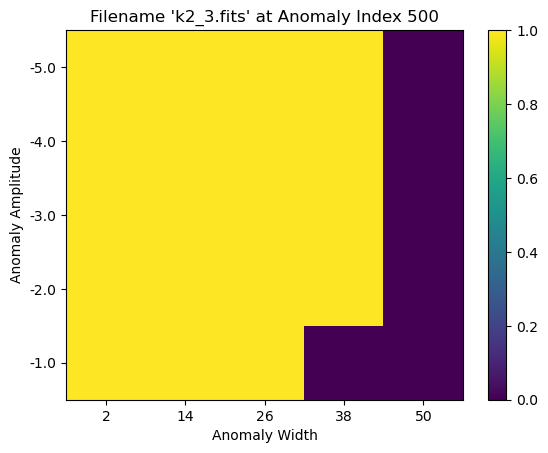

In [3]:
filename = "k2_3.fits"
location = 500
results = results[results['filename'] == filename]
results = results[results['location_idx'] == location]
results = results.drop_duplicates(subset=['amp', 'width_stdev'])

# Plot an imshow image colored by identified_ratio, x_axis is width_stdev, y_axis is amp
pivot = results.pivot(index='amp', columns='width_stdev', values='identified_ratio')
plt.imshow(pivot, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.title(f"Filename '{filename}' at Anomaly Index {location}")
plt.xlabel("Anomaly Width")
plt.ylabel("Anomaly Amplitude")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)

## Full dataset analysis

In [49]:
data_dir = "../results/"
data_file = "gp_varying_anomaly_size_results.csv"

# Load data
results = pd.read_csv(data_dir + data_file)
results = results[results['location_idx'] != 2000]
results = results[results['location_idx'] != 3500]

# Get unique filenames and locations
filenames = results['filename'].unique()
short_filenames = [filename.split('k2_')[1].split('.fits')[0] for filename in filenames]
locations = results['location_idx'].unique()

# Print
print(filenames, short_filenames)
print(locations)
results.head()

['k2_3.fits' 'k2_18.fits' 'k2_48.fits'] ['3', '18', '48']
[ 500 1750 3000]


,filename,amp,width_stdev,shape,location_idx,flagged_anomalies,identified,identified_ratio
0,k2_3.fits,-4.0,14,gaussian,500,[ 455 456 457 458 459 460 461 462 463 ...,1.0,1.0
1,k2_3.fits,-5.0,2,gaussian,500,[ 480 481 482 483 484 485 486 487 488 ...,1.0,1.0
2,k2_3.fits,-4.0,2,gaussian,500,[ 490 491 492 493 494 495 496 497 498 ...,1.0,1.0
3,k2_3.fits,-3.0,2,gaussian,500,[ 492 493 494 495 496 497 498 499 500 ...,1.0,1.0
4,k2_3.fits,-2.0,2,gaussian,500,[ 492 493 494 495 496 497 498 499 500 ...,1.0,1.0


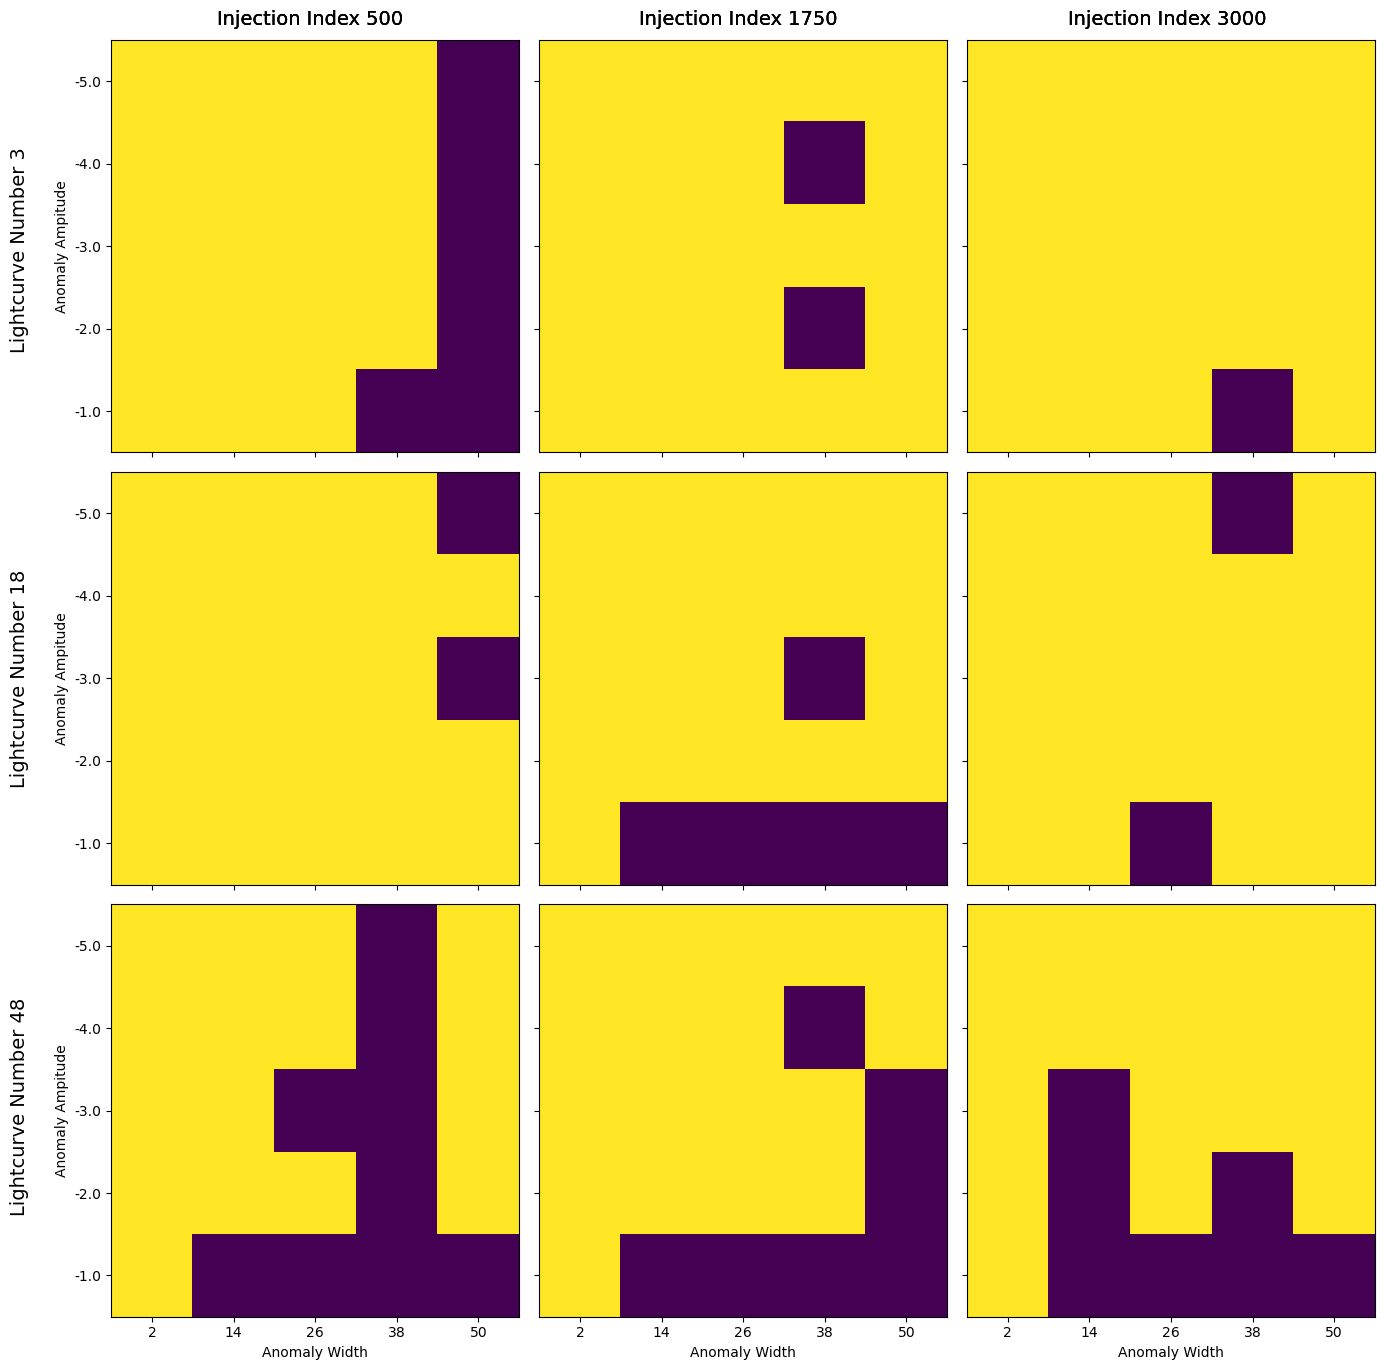

In [55]:
# Create figure
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
# fig.suptitle('Yellow: Anomaly Recovered, Purple: Anomaly Not Recovered', fontsize=16)
for ax in axs.flat:
    ax.label_outer()

# Plot each filename and location
for i, filename in enumerate(filenames):
    # Label the row and y axis of outer plot
    axs[i, 0].set_ylabel(f"Anomaly Ampitude")
    fig.text(0.03, 0.8 - i / 3.5, f"Lightcurve Number {short_filenames[i]}", va='center', rotation='vertical', fontsize=14)

    for j, location in enumerate(locations):
        # Label the column and x axis of outer plot
        axs[2, j].set_xlabel(f"Anomaly Width")
        fig.text(0.23 + j / 3.5, 0.95, f"Injection Index {location}", ha='center', fontsize=14)

        current = results[results['filename'] == filename]
        current = current[current['location_idx'] == location]
        current = current.drop_duplicates(subset=['amp', 'width_stdev'])

        pivot = current.pivot(index='amp', columns='width_stdev', values='identified_ratio')
        axs[i, j].imshow(pivot, cmap='viridis', interpolation='nearest', aspect='auto')
        axs[i, j].set_xticks(range(len(pivot.columns)))
        axs[i, j].set_xticklabels(pivot.columns)
        axs[i, j].set_yticks(range(len(pivot.index)))
        axs[i, j].set_yticklabels(pivot.index)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()